MALDONADO_ALCALA_LEONARDO_6IV8_ANALISIS_DE_DATOS
NOTEBOOK DE ANALISIS DE DATOS 1

Primero instalamos librerias, llamamos los csv y los guardamos en variables
y el punto 1) es Conocer las ventas totales del comercio


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
proyecto1=pd.read_csv('/Users/leonardomaldonadoalcala/MALDONADO_ALCALA_LEONARDO_6IV8_ANALISIS_DE_DATOS/ElementosBasicosEstadistica/proyecto1.csv')
catalogo_sucursales=pd.read_csv('/Users/leonardomaldonadoalcala/MALDONADO_ALCALA_LEONARDO_6IV8_ANALISIS_DE_DATOS/ElementosBasicosEstadistica/Catalogo_sucursal.csv')

ventasTotales = proyecto1['ventas_tot'].sum()
print(f'Las ventas totales son de  = {ventasTotales}')

Las ventas totales son de  = 1822223747


El punto 2 pide conocer el porcentaje de adeudados y no adeudados

In [28]:
adeudados = (proyecto1['B_adeudo']== 'Con adeudo').sum()
noAdeudados = (proyecto1['B_adeudo']== 'Sin adeudo').sum()
print(f'Socios con adeudos = {adeudados}')
print(f'Socios sin adeudos = {noAdeudados}')
print(f'Porcentaje de adeudos = {adeudados/len(proyecto1)*100}%')
print(f'Porcentaje de no adeudos = {noAdeudados/len(proyecto1)*100}%')

Socios con adeudos = 5120
Socios sin adeudos = 6222
Porcentaje de adeudos = 45.141950273320404%
Porcentaje de no adeudos = 54.8580497266796%


Grafica donde se pueda observar las ventas totales respecto del tiempo, en una grafica de barras 


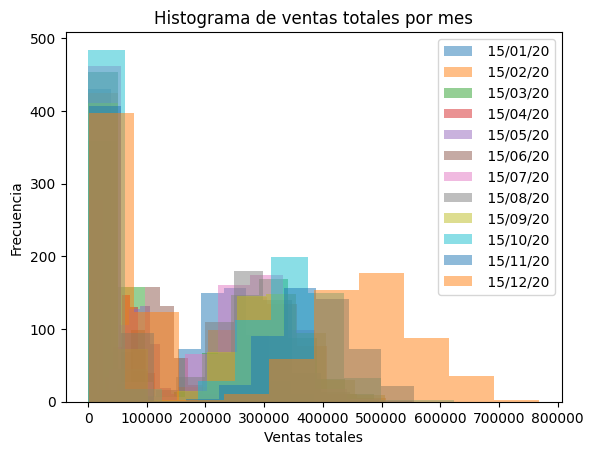

In [19]:
tiempo = proyecto1['B_mes']
for fecha in tiempo.unique():
    plt.hist(proyecto1[tiempo == fecha]['ventas_tot'], bins=10, alpha=0.5, label=f' {fecha}')

plt.title('Histograma de ventas totales por mes')
plt.xlabel('Ventas totales')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Grafica donde se pueda visualizar la desviación estándar de los pagos realizados del comercio respecto del tiempo

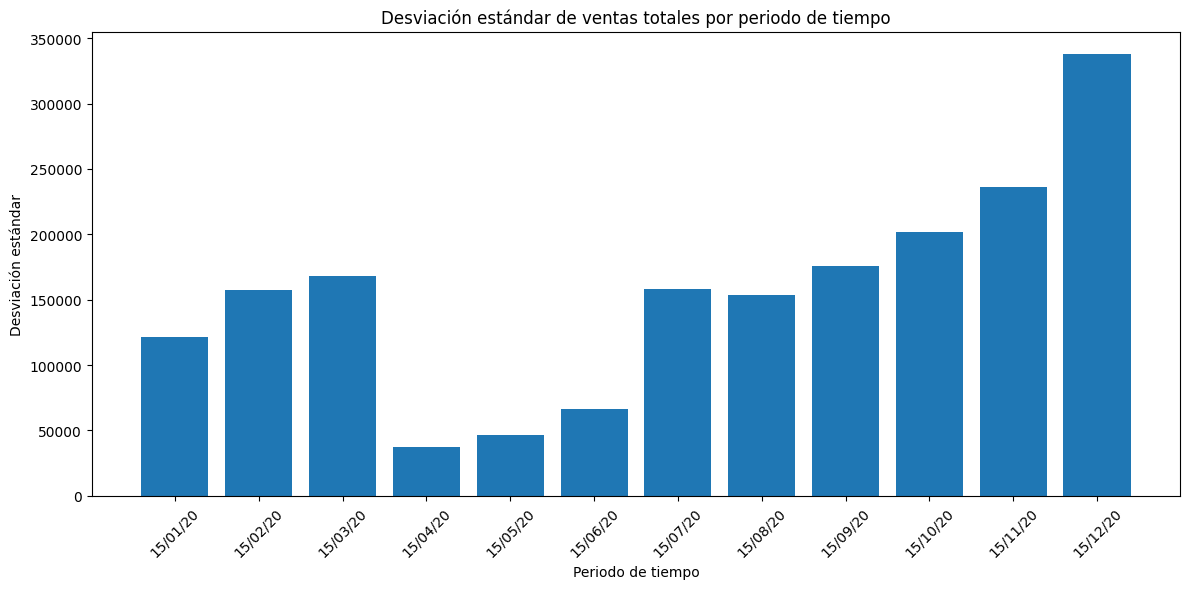

In [24]:

std_por_fecha = []
fechas = []

for fecha in tiempo.unique():
    std = proyecto1[tiempo == fecha]['pagos_tot'].std()
    std_por_fecha.append(std)
    fechas.append(fecha)
    
plt.figure(figsize=(12, 6))
plt.bar(fechas, std_por_fecha)
plt.title('Desviación estándar de ventas totales por periodo de tiempo')
plt.xlabel('Periodo de tiempo')
plt.ylabel('Desviación estándar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Deuda total de clientes

In [25]:
deuda_total = proyecto1['adeudo_actual'].sum()
print(f'Deuda total = {deuda_total}')

Deuda total = 81365970.62


Cuanto es el porcentaje de utilidad del comercio a partir de el total de las ventas respecto del adeudo 

In [27]:
utildad = ventasTotales - deuda_total
print(f'Utilidad = {utildad}')
utildad_porcentaje = utildad/ventasTotales*100
print(f'Utilidad porcentaje = {utildad_porcentaje} %')

Utilidad = 1740857776.38
Utilidad porcentaje = 95.53479803158334 %


In [41]:

mapeo_sucursales = dict(zip(catalogo_sucursales['id_sucursal'], catalogo_sucursales['suc']))
proyecto1['id_sucursal'] = proyecto1['id_sucursal'].map(mapeo_sucursales)

proyecto1

,Unnamed: 0,B_mes,fec_ini_cdto,id_sucursal,B_adeudo,ventas_tot,no_clientes,adeudo_actual,pagos_tot,no_cdtos
0,1,15/01/20,01/01/20,CDMX,Con adeudo,27427,5,9117.21,18442.62,21
1,2,15/01/20,01/01/20,CDMX,Sin adeudo,238462,30,0.00,244416.98,91
2,3,15/01/20,01/01/20,VER,Con adeudo,7803,1,4480.53,3349.57,3
3,4,15/01/20,01/01/20,VER,Sin adeudo,224499,32,0.00,230930.56,94
4,5,15/01/20,01/01/20,LEON,Con adeudo,19547,2,10477.51,9160.11,5
...,...,...,...,...,...,...,...,...,...,...
11337,11338,15/12/20,31/12/20,SLP,Sin adeudo,474740,39,0.00,651734.28,191
11338,11339,15/12/20,31/12/20,BCS,Con adeudo,40152,5,24082.78,19024.12,16
11339,11340,15/12/20,31/12/20,BCS,Sin adeudo,583150,47,0.00,833692.33,227
11340,11341,15/12/20,31/12/20,BCN,Con adeudo,99706,8,29336.14,82198.36,43


Gráfica de pastel ventas por sucursal

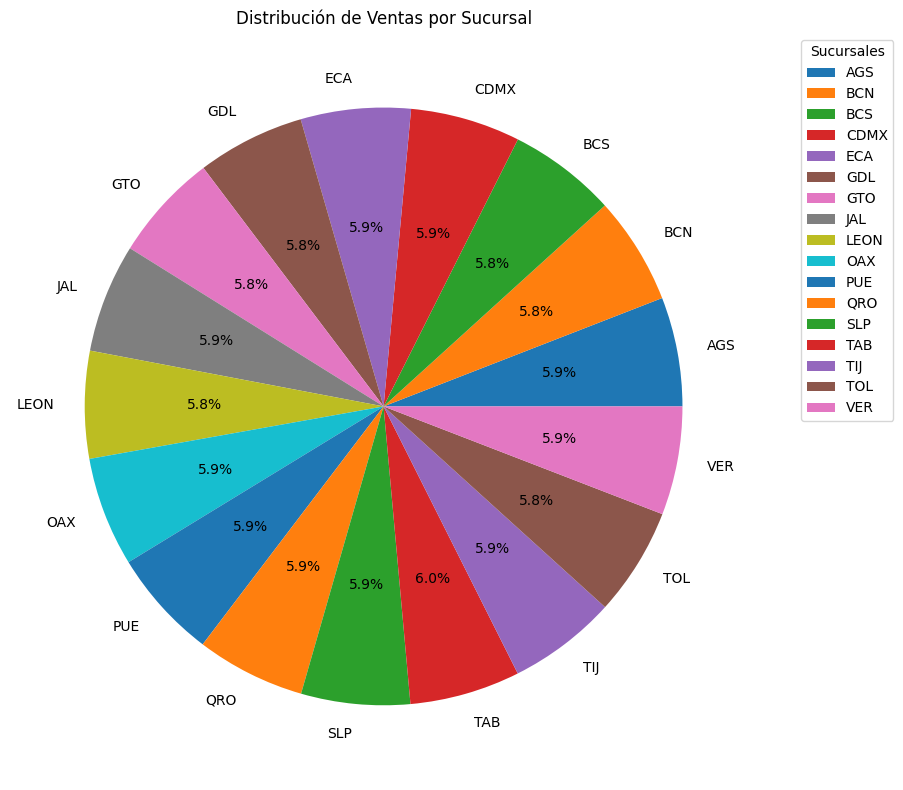

In [44]:
ventas_por_sucursal = proyecto1.groupby('id_sucursal')['ventas_tot'].sum()

plt.figure(figsize=(10, 8))
plt.pie(ventas_por_sucursal.values, labels=ventas_por_sucursal.index, autopct='%1.1f%%')
plt.title('Distribución de Ventas por Sucursal')

plt.legend(title="Sucursales", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Presentar un grafico de cuales son las deudas totales por cada sucursal respecto del margen de utilidad de cada sucursal.

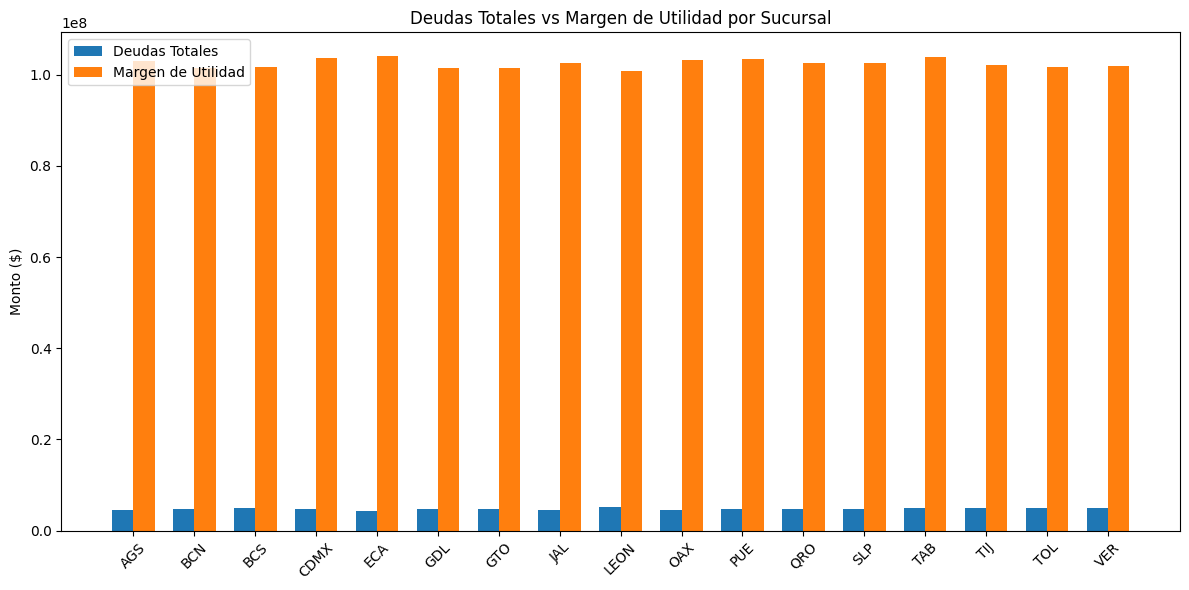

In [55]:
deudas_por_sucursal = proyecto1.groupby('id_sucursal')['adeudo_actual'].sum()
ventas_por_sucursal = proyecto1.groupby('id_sucursal')['ventas_tot'].sum()
margen_por_sucursal = ventas_por_sucursal-deudas_por_sucursal

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(deudas_por_sucursal))
width = 0.35

rects1 = ax.bar(x - width/2, deudas_por_sucursal, width, label='Deudas Totales')
rects2 = ax.bar(x + width/2, margen_por_sucursal, width, label='Margen de Utilidad')

ax.set_ylabel('Monto ($)')
ax.set_title('Deudas Totales vs Margen de Utilidad por Sucursal')
ax.set_xticks(x)
ax.set_xticklabels(deudas_por_sucursal.index, rotation=45)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:,.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()